In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.applications import resnet_v2, vgg16, vgg19
# from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

import os
import pathlib

In [8]:
data_path = "/home/aiia/daeun/data/train/"
data_dir = pathlib.Path(data_path)

In [9]:
img_height =  512
img_width = 128
batch_size = 16

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  seed=1234,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  seed=1234,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 1598 files belonging to 3 classes.
Using 1279 files for training.
Found 1598 files belonging to 3 classes.
Using 319 files for validation.


In [11]:
num_classes = len(class_names)
train_data = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))
val_data = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=num_classes)))

In [12]:
epochs = 100

model = resnet_v2.ResNet152V2(include_top=True, weights=None, input_shape=(img_height, img_width, 3), pooling=max, classes=num_classes)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer='adam')

# checkpoint_filepath = './checkpoint/mymodel_{epoch}'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#   filepath=checkpoint_filepath,
#   monitor='val_accuracy',
#   mode='max',
#   save_best_only=True
# )
filepath = "/home/aiia/daeun/data/new_3_checkpoint/saved-model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=[checkpoint])

# history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


model.save(filepath)

Epoch 1/100


2023-11-02 10:00:22.921678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-02 10:00:23.890471: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8bf2c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-02 10:00:23.890499: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-11-02 10:00:23.895971: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-02 10:00:23.977552: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 [==============================] - ETA: 0s - loss: 0.7360 - accuracy: 0.7131
Epoch 1: val_accuracy improved from -inf to 0.48903, saving model to /home/aiia/daeun/data/new_3_checkpoint/saved-model-01-0.49.h5


/home/aiia/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 85s 271ms/step - loss: 0.7360 - accuracy: 0.7131 - val_loss: 27947.3926 - val_accuracy: 0.4890
Epoch 2/100
80/80 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.7506
Epoch 2: val_accuracy improved from 0.48903 to 0.79937, saving model to /home/aiia/daeun/data/new_3_checkpoint/saved-model-02-0.80.h5
80/80 [==============================] - 18s 221ms/step - loss: 0.5896 - accuracy: 0.7506 - val_loss: 0.4759 - val_accuracy: 0.7994
Epoch 3/100
80/80 [==============================] - ETA: 0s - loss: 0.5403 - accuracy: 0.7576
Epoch 3: val_accuracy improved from 0.79937 to 0.80564, saving model to /home/aiia/daeun/data/new_3_checkpoint/saved-model-03-0.81.h5
80/80 [==============================] - 18s 221ms/step - loss: 0.5403 - accuracy: 0.7576 - val_loss: 0.6798 - val_accuracy: 0.8056
Epoch 4/100
80/80 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.7482
Epoch 4: val_accuracy did not improve from 0.80

Epoch 30/100
80/80 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9390
Epoch 30: val_accuracy did not improve from 0.84326
80/80 [==============================] - 16s 205ms/step - loss: 0.1781 - accuracy: 0.9390 - val_loss: 14.2071 - val_accuracy: 0.7868
Epoch 31/100
80/80 [==============================] - ETA: 0s - loss: 0.1362 - accuracy: 0.9547
Epoch 31: val_accuracy did not improve from 0.84326
80/80 [==============================] - 16s 204ms/step - loss: 0.1362 - accuracy: 0.9547 - val_loss: 2.5628 - val_accuracy: 0.7743
Epoch 32/100
80/80 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9687
Epoch 32: val_accuracy did not improve from 0.84326
80/80 [==============================] - 16s 203ms/step - loss: 0.0923 - accuracy: 0.9687 - val_loss: 0.7756 - val_accuracy: 0.8401
Epoch 33/100
80/80 [==============================] - ETA: 0s - loss: 0.0718 - accuracy: 0.9711
Epoch 33: val_accuracy did not improve from 0.84326
80/80 [====

Epoch 59/100
80/80 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9969
Epoch 59: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.8551 - val_accuracy: 0.8370
Epoch 60/100
80/80 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9945
Epoch 60: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.0155 - accuracy: 0.9945 - val_loss: 0.9227 - val_accuracy: 0.8401
Epoch 61/100
80/80 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9992
Epoch 61: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.9688 - val_accuracy: 0.8495
Epoch 62/100
80/80 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984
Epoch 62: val_accuracy did not improve from 0.86207
80/80 [=====

80/80 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9812
Epoch 88: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.0693 - accuracy: 0.9812 - val_loss: 3.8339 - val_accuracy: 0.8276
Epoch 89/100
80/80 [==============================] - ETA: 0s - loss: 0.1280 - accuracy: 0.9617
Epoch 89: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.1280 - accuracy: 0.9617 - val_loss: 1.3618 - val_accuracy: 0.7994
Epoch 90/100
80/80 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9875
Epoch 90: val_accuracy did not improve from 0.86207
80/80 [==============================] - 16s 204ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.7185 - val_accuracy: 0.8370
Epoch 91/100
80/80 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9906
Epoch 91: val_accuracy did not improve from 0.86207
80/80 [==================

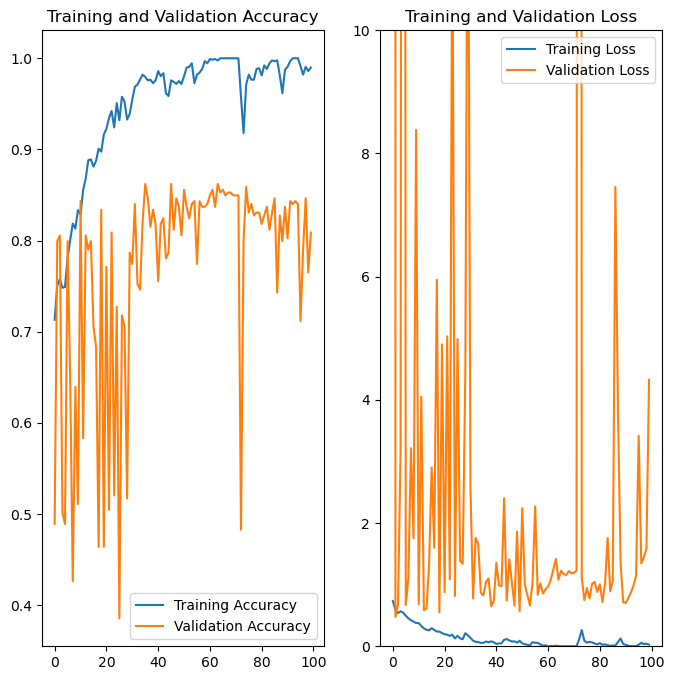

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim([0, 10])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()